In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
from pycaret.regression import *
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [ ]:
data_path = 'aces_ma - 15.csv'
df = pd.read_csv(data_path, parse_dates=['Date'])

In [ ]:
df['MA'] = df['MA'].str.replace(',', '.').astype(float)

In [ ]:
# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['MA'] = scaler.fit_transform(np.array(df['MA']).reshape(-1, 1))

In [ ]:
# Pembagian data latih 90% dan data validasi 10%
training_size = int(len(df) * 0.9)
train_data, test_data = df[:training_size], df[training_size:]

In [ ]:
# PyCaret setup
reg = setup(data=train_data, target='MA', session_id=123, train_size=0.9, fold=5, verbose=False)

In [ ]:
# Membandingkan model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0077,0.0002,0.0139,0.9979,0.0085,0.0235,0.6800
xgboost,Extreme Gradient Boosting,0.0090,0.0002,0.0143,0.9977,0.0089,0.0643,0.3720
lightgbm,Light Gradient Boosting Machine,0.0097,0.0002,0.0152,0.9975,0.0095,0.1350,1.2600
rf,Random Forest Regressor,0.0090,0.0002,0.0157,0.9973,0.0097,0.0368,1.5300
gbr,Gradient Boosting Regressor,0.0122,0.0003,0.0186,0.9962,0.0115,0.2322,0.6900
lr,Linear Regression,0.0137,0.0004,0.0208,0.9953,0.0128,0.1784,1.2160
ridge,Ridge Regression,0.0137,0.0004,0.0208,0.9953,0.0128,0.1784,0.0460
lar,Least Angle Regression,0.0137,0.0004,0.0208,0.9953,0.0128,0.1784,0.0460
br,Bayesian Ridge,0.0137,0.0004,0.0208,0.9953,0.0128,0.1727,0.0440
dt,Decision Tree Regressor,0.0107,0.0005,0.0212,0.9950,0.0130,0.0373,0.0960


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Membuat model terbaik
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0068,0.0001,0.0117,0.9985,0.0073,0.0259
1,0.0076,0.0002,0.0132,0.9981,0.0080,0.0204
2,0.0078,0.0002,0.0149,0.9976,0.0090,0.0241
3,0.0081,0.0002,0.0148,0.9974,0.0092,0.0261
4,0.0080,0.0002,0.0149,0.9976,0.0089,0.0210
Mean,0.0077,0.0002,0.0139,0.9979,0.0085,0.0235
Std,0.0005,0.0000,0.0013,0.0004,0.0007,0.0024


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Melatih model terbaik
model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0183,0.0006,0.0238,0.9938,0.0155,1.5615
1,0.0200,0.0007,0.0259,0.9928,0.0163,1.2291
2,0.0214,0.0008,0.0279,0.9916,0.0180,2.1692
3,0.0190,0.0007,0.0256,0.9923,0.0165,0.7472
4,0.0188,0.0007,0.0258,0.9928,0.0165,1.9581
Mean,0.0195,0.0007,0.0258,0.9927,0.0165,1.5330
Std,0.0011,0.0001,0.0013,0.0007,0.0008,0.5091


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Memprediksi data uji
predictions = predict_model(model, data=test_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0216,0.0007,0.0272,0.8871,0.0205,0.0695


In [ ]:
# Menampilkan kolom pada DataFrame predictions untuk melihat nama kolom prediksi
print(predictions.columns)

Index(['Date', 'open', 'high', 'low', 'close', 'Volume', 'MA',
       'prediction_label'],
      dtype='object')


In [ ]:
# Memastikan kolom prediksi benar
prediction_column = 'Label' if 'Label' in predictions.columns else 'prediction_label'  # Adjust this based on actual column name


In [ ]:
# Menambahkan kolom prediksi ke DataFrame test_data
test_data['MA_pred'] = predictions[prediction_column]

In [ ]:
# Membalikkan skala prediksi dan data asli
test_data['MA_pred'] = scaler.inverse_transform(test_data[['MA_pred']])
test_data['MA_actual'] = scaler.inverse_transform(test_data[['MA']])

In [ ]:
# Menghitung MAPE dan RMSE
test_mape = mean_absolute_percentage_error(test_data['MA_actual'], test_data['MA_pred'])
test_rmse = np.sqrt(mean_squared_error(test_data['MA_actual'], test_data['MA_pred']))

print(f'Test MAPE: {test_mape}, Test RMSE: {test_rmse}')

Test MAPE: 0.06198495295579613, Test RMSE: 48.17179389693024


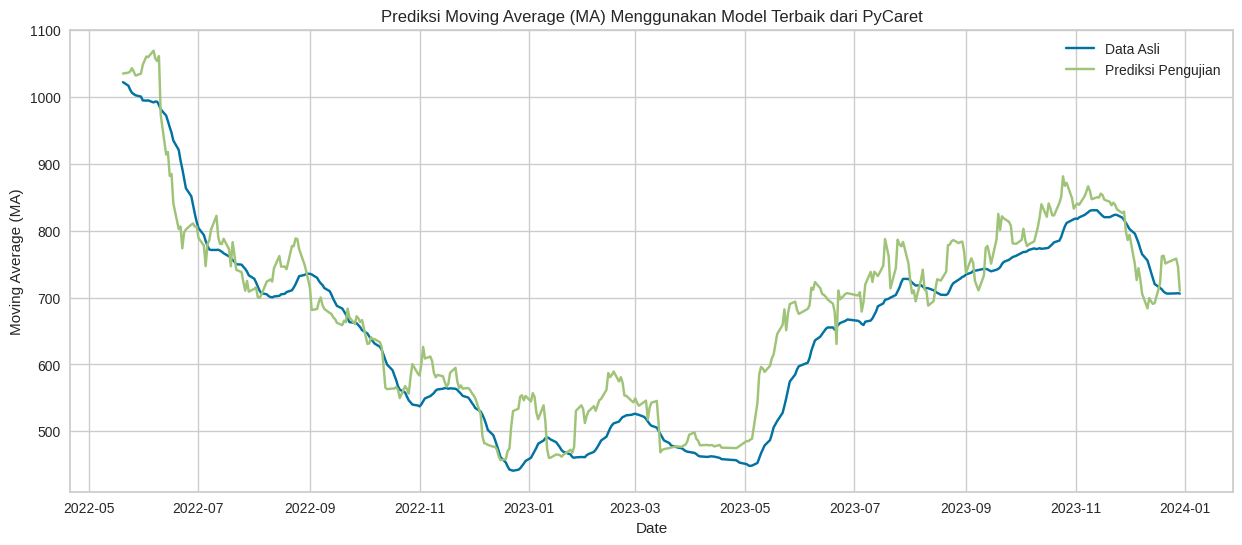

In [ ]:
# Visualisasi hasil prediksi terhadap nilai asli
plt.figure(figsize=(15, 6))
plt.plot(test_data['Date'], test_data['MA_actual'], label='Data Asli')
plt.plot(test_data['Date'], test_data['MA_pred'], label='Prediksi Pengujian')
plt.xlabel('Date')
plt.ylabel('Moving Average (MA)')
plt.title('Prediksi Moving Average (MA) Menggunakan Model Terbaik dari PyCaret')
plt.legend()
plt.show()

In [ ]:
# Melihat parameter dari model yang telah dituning
print(model)

ExtraTreesRegressor(n_jobs=-1, random_state=123)
